# Text data Processing

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words
- document-term matrix
- tfidf

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [31]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray())
print(vect.get_feature_names())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [34]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]
 [0.  0.7 0.  0.3 0.  0.5 0.3 0.  0.3]
 [0.5 0.  0.  0.3 0.5 0.  0.3 0.5 0.3]
 [0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [39]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[1.  0.  0.  0. ]
 [0.6 0.5 0.5 0.5]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0. ]]
['document', 'document second', 'second', 'second document']


### practical example

In [40]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   141  100   141    0     0    213      0 --:--:-- --:--:-- --:--:--   213

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

100  488k  100  488k    0     0   219k      0  0:00:02  0:00:02 --:--:--  219k


In [56]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head(3)

type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...

In [57]:
sms.columns = ['category', 'text']
sms.head(3)

category                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...

In [58]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

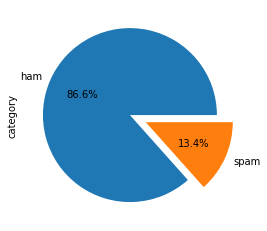

In [59]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [60]:
sms.head()

category                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [72]:
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [73]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

In [75]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(0)[i] for i in iidx])

['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


### word cloud

In [76]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [82]:
spam_sms.values.shape

(747,)

In [85]:
!pip install nltk

In [91]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kwctl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kwctl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [93]:
v

In [95]:
len(spam_words)

18822

In [97]:
!pip install wordcloud

In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

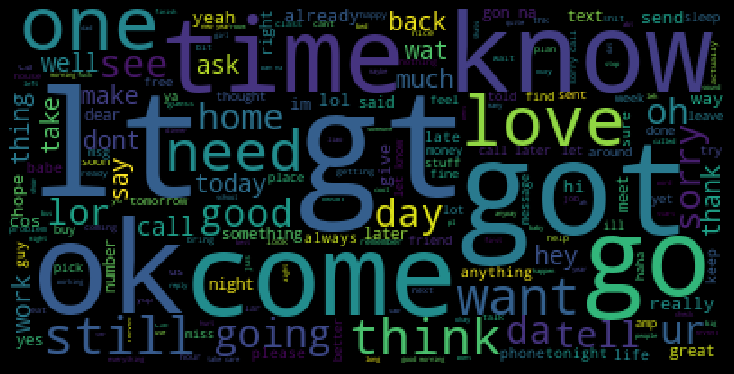

In [101]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Word Embedding
- word vector

In [103]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-2.2.1-py3-none-any.whl size=114118 sha256=754e3fc7285cc95d6c59094e5c2364d263e6509e4d33774215c73286dbb58735
  Stored in directory: c:\users\kwctl\appdata\local\pip\cache\wheels\27\29\59\1e092b4bf54a2a70eb600ec0b5b82a5dee3149019148b15fb0
  Created wheel for boto3: filename=boto3-1.15.13-py2.py3-none-any.whl size=127863 sha256=2abe0bed1865ded0a41e9103aa2688b6c2732b59412196feda1eeab916ab37f8
  Stored in directory: c:\users\kwctl\appdata\local\pip\cache\wheels\92\54\65\eec094c53083b81036c99f5a307fc1426ee0043db5b6555a26
Successfully built smart-open boto3
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15


In [104]:
from gensim.models.word2vec import Word2Vec

In [106]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [107]:
model = Word2Vec(sentences, min_count=1, size=5)

In [108]:
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [110]:
words = list(model.wv.vocab)   # summarize the vocabulary
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [112]:
model['sentence','this']

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.00877874, -0.02393538, -0.02025849, -0.07985193, -0.08226778],
       [ 0.06104629,  0.07065317,  0.05453938, -0.02353298, -0.01667036]],
      dtype=float32)

In [113]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [114]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [115]:
result

array([[ 0.01866058,  0.05276276],
       [-0.02023122, -0.06731906],
       [-0.0052139 , -0.03730084],
       [-0.00369888, -0.02557249],
       [-0.0852119 ,  0.05106262],
       [ 0.10478073,  0.10358451],
       [ 0.10815503, -0.06827581],
       [ 0.14650944, -0.04857773],
       [-0.12806188, -0.05244071],
       [-0.04901588,  0.07183086],
       [-0.10596032, -0.07368667],
       [-0.05717396,  0.08804998],
       [-0.01501704,  0.01073535],
       [ 0.09147925, -0.00485282]], dtype=float32)

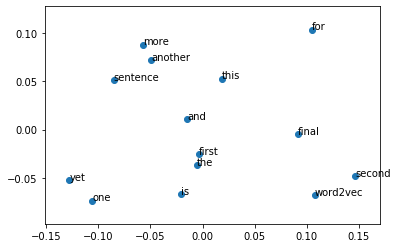

In [120]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [121]:
model[words]

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.06104629,  0.07065317,  0.05453938, -0.02353298, -0.01667036],
       [-0.07202195,  0.08903281, -0.00796283, -0.01655359, -0.03019751],
       [-0.02268207,  0.05017111, -0.04710487, -0.02501444,  0.0863364 ],
       [-0.03158765,  0.02411141,  0.03753338, -0.08120296,  0.06972831],
       [-0.00877874, -0.02393538, -0.02025849, -0.07985193, -0.08226778],
       [ 0.08245939,  0.00494455,  0.06373035,  0.07742076, -0.01130833],
       [-0.07460427,  0.06990761,  0.04472209,  0.09039905,  0.02145371],
       [-0.09854933, -0.03251702,  0.0865277 ,  0.0822259 ,  0.06770398],
       [-0.07763837,  0.05663277, -0.08081486, -0.09108242, -0.06630307],
       [ 0.04393163,  0.02197519, -0.04704082, -0.01239931, -0.07566445],
       [-0.08999043,  0.08798542, -0.03678966, -0.08814508, -0.0754524 ],
       [ 0.01943044, -0.08415849, -0.03103743, -0.06872411, -0.018416  ],
       [-0.0640931 , -0.04210958, -0.06741317,  0.04491327, -0.06981553],
       [-0.05201539,  0.03146783,  0.0

In [122]:
model.most_similar('word2vec')

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('second', 0.7138605713844299),
 ('final', 0.7064062356948853),
 ('is', 0.5227254629135132),
 ('for', 0.20067495107650757),
 ('the', 0.1600852608680725),
 ('and', 0.07249639928340912),
 ('one', 0.064200758934021),
 ('this', 0.020860357210040092),
 ('first', -0.00710684061050415),
 ('yet', -0.14366558194160461)]

In [126]:
model.similarity('sentence', 'word2vec')

C:\Users\kwctl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.6302799